In [93]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, plot_roc_curve, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from plotnine import *
import openpyxl
import seaborn as sns
import datetime

In [94]:
from datetime import datetime

In [95]:
from sklearn import datasets
#import drizly dataset and clean then names 
df = pd.read_excel(r'drizly_assignment_data.xlsx' )
#clean then names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

#encode the following column names "retailer_id", "order_status", "substitution" 
df['retailer_id'] = LabelEncoder().fit_transform(df['retailer_id'])
df['order_status'] = LabelEncoder().fit_transform(df['order_status'])
df['substitution'] = LabelEncoder().fit_transform(df['substitution'])
#and reset the index
df = df.reset_index(drop = True)
df
#df.drop(columns=['id'], axis = 1, inplace = True)                



,retailer_id,delivery_neighborhood_id,order_id,order_date,order_time,order_status,delivery_time,gmv,delivery_fee,substitution,substituion_binary,order_status_binary
0,0,1,11-00011,2020-03-30,12:05:00,0,34.0,71,4.99,0,0,1
1,0,1,11-00012,2020-03-30,12:17:00,0,28.0,156,4.99,0,0,1
2,0,1,11-00013,2020-03-30,12:34:00,0,30.0,29,4.99,0,0,1
3,0,1,11-00015,2020-03-30,12:55:00,0,30.0,32,4.99,0,0,1
4,0,1,11-00014,2020-03-30,12:55:00,0,26.0,80,4.99,0,0,1
5,0,1,11-00016,2020-03-30,13:22:00,0,40.0,80,4.99,1,1,1
6,0,1,11-00017,2020-03-30,13:56:00,0,28.0,72,4.99,0,0,1
7,0,1,11-00018,2020-03-30,14:02:00,0,31.0,25,4.99,0,0,1
8,0,1,11-00019,2020-03-30,14:36:00,0,21.0,33,4.99,0,0,1
9,0,1,11-00020,2020-03-30,15:06:00,0,28.0,37,4.99,0,0,1


In [96]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   retailer_id               2320 non-null   int64         
 1   delivery_neighborhood_id  2320 non-null   int64         
 2   order_id                  2320 non-null   object        
 3   order_date                2320 non-null   datetime64[ns]
 4   order_time                2320 non-null   object        
 5   order_status              2320 non-null   int32         
 6   delivery_time             2002 non-null   float64       
 7   gmv                       2320 non-null   int64         
 8   delivery_fee              2320 non-null   float64       
 9   substitution              2320 non-null   int64         
 10  substituion_binary        2320 non-null   int64         
 11  order_status_binary       2320 non-null   int64         
dtypes: datetime64[ns](1)

In [98]:
df.describe()

,retailer_id,delivery_neighborhood_id,order_status,delivery_time,gmv,delivery_fee,substitution,substituion_binary,order_status_binary
count,2320.000000,2320.0,2320.000000,2002.000000,2320.000000,2.320000e+03,2320.000000,2320.000000,2320.000000
mean,0.884483,1.0,0.137069,77.054446,66.358621,4.990000e+00,0.070259,0.070259,0.862931
std,0.815715,0.0,0.343994,48.109254,45.521830,1.785623e-13,0.255637,0.255637,0.343994
min,0.000000,1.0,0.000000,20.000000,20.000000,4.990000e+00,0.000000,0.000000,0.000000
25%,0.000000,1.0,0.000000,36.000000,36.000000,4.990000e+00,0.000000,0.000000,1.000000
50%,1.000000,1.0,0.000000,63.000000,54.000000,4.990000e+00,0.000000,0.000000,1.000000
75%,2.000000,1.0,0.000000,109.000000,79.000000,4.990000e+00,0.000000,0.000000,1.000000
max,2.000000,1.0,1.000000,234.000000,250.000000,4.990000e+00,1.000000,1.000000,1.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   retailer_id               2320 non-null   int64         
 1   delivery_neighborhood_id  2320 non-null   int64         
 2   order_id                  2320 non-null   object        
 3   order_date                2320 non-null   datetime64[ns]
 4   order_time                2320 non-null   object        
 5   order_status              2320 non-null   int32         
 6   delivery_time             2002 non-null   float64       
 7   gmv                       2320 non-null   int64         
 8   delivery_fee              2320 non-null   float64       
 9   substitution              2320 non-null   int64         
 10  substituion_binary        2320 non-null   int64         
 11  order_status_binary       2320 non-null   int64         
dtypes: datetime64[ns](1)

In [100]:
### one hot encode the retailer id column and drop the original column###
df_onehot = pd.get_dummies(df, columns=['retailer_id'], drop_first=True)
# fixed this up
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   delivery_neighborhood_id  2320 non-null   int64         
 1   order_id                  2320 non-null   object        
 2   order_date                2320 non-null   datetime64[ns]
 3   order_time                2320 non-null   object        
 4   order_status              2320 non-null   int32         
 5   delivery_time             2002 non-null   float64       
 6   gmv                       2320 non-null   int64         
 7   delivery_fee              2320 non-null   float64       
 8   substitution              2320 non-null   int64         
 9   substituion_binary        2320 non-null   int64         
 10  order_status_binary       2320 non-null   int64         
 11  retailer_id_1             2320 non-null   uint8         
 12  retailer_id_2       

In [101]:
df.head(20)

,retailer_id,delivery_neighborhood_id,order_id,order_date,order_time,order_status,delivery_time,gmv,delivery_fee,substitution,substituion_binary,order_status_binary
0,0,1,11-00011,2020-03-30,12:05:00,0,34.0,71,4.99,0,0,1
1,0,1,11-00012,2020-03-30,12:17:00,0,28.0,156,4.99,0,0,1
2,0,1,11-00013,2020-03-30,12:34:00,0,30.0,29,4.99,0,0,1
3,0,1,11-00015,2020-03-30,12:55:00,0,30.0,32,4.99,0,0,1
4,0,1,11-00014,2020-03-30,12:55:00,0,26.0,80,4.99,0,0,1
5,0,1,11-00016,2020-03-30,13:22:00,0,40.0,80,4.99,1,1,1
6,0,1,11-00017,2020-03-30,13:56:00,0,28.0,72,4.99,0,0,1
7,0,1,11-00018,2020-03-30,14:02:00,0,31.0,25,4.99,0,0,1
8,0,1,11-00019,2020-03-30,14:36:00,0,21.0,33,4.99,0,0,1
9,0,1,11-00020,2020-03-30,15:06:00,0,28.0,37,4.99,0,0,1


In [102]:
#Create a weekday number called order_weekday
df['order_weekday'] = df['order_date'].dt.weekday

#data Dict to use into for loop to set up the day of week names
day_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [103]:
#Create an empty column in the DF with the a string then for loops inserting the week day number into an actual day
df['order_weekday_name'] = ''
for i in range(len(df)):
    df['order_weekday_name'].iloc[i] = day_of_week[df['order_weekday'].iloc[i]]

In [104]:
#Test to see days are correct (Not needed in process)
df['order_weekday_name'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   retailer_id               2320 non-null   int64         
 1   delivery_neighborhood_id  2320 non-null   int64         
 2   order_id                  2320 non-null   object        
 3   order_date                2320 non-null   datetime64[ns]
 4   order_time                2320 non-null   object        
 5   order_status              2320 non-null   int32         
 6   delivery_time             2002 non-null   float64       
 7   gmv                       2320 non-null   int64         
 8   delivery_fee              2320 non-null   float64       
 9   substitution              2320 non-null   int64         
 10  substituion_binary        2320 non-null   int64         
 11  order_status_binary       2320 non-null   int64         
 12  order_weekday       

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   retailer_id               2320 non-null   int64         
 1   delivery_neighborhood_id  2320 non-null   int64         
 2   order_id                  2320 non-null   object        
 3   order_date                2320 non-null   datetime64[ns]
 4   order_time                2320 non-null   object        
 5   order_status              2320 non-null   int32         
 6   delivery_time             2002 non-null   float64       
 7   gmv                       2320 non-null   int64         
 8   delivery_fee              2320 non-null   float64       
 9   substitution              2320 non-null   int64         
 10  substituion_binary        2320 non-null   int64         
 11  order_status_binary       2320 non-null   int64         
 12  order_weekday       

In [107]:
df.head(100)

,retailer_id,delivery_neighborhood_id,order_id,order_date,order_time,order_status,delivery_time,gmv,delivery_fee,substitution,substituion_binary,order_status_binary,order_weekday,order_weekday_name
0,0,1,11-00011,2020-03-30,12:05:00,0,34.0,71,4.99,0,0,1,0,Monday
1,0,1,11-00012,2020-03-30,12:17:00,0,28.0,156,4.99,0,0,1,0,Monday
2,0,1,11-00013,2020-03-30,12:34:00,0,30.0,29,4.99,0,0,1,0,Monday
3,0,1,11-00015,2020-03-30,12:55:00,0,30.0,32,4.99,0,0,1,0,Monday
4,0,1,11-00014,2020-03-30,12:55:00,0,26.0,80,4.99,0,0,1,0,Monday
5,0,1,11-00016,2020-03-30,13:22:00,0,40.0,80,4.99,1,1,1,0,Monday
6,0,1,11-00017,2020-03-30,13:56:00,0,28.0,72,4.99,0,0,1,0,Monday
7,0,1,11-00018,2020-03-30,14:02:00,0,31.0,25,4.99,0,0,1,0,Monday
8,0,1,11-00019,2020-03-30,14:36:00,0,21.0,33,4.99,0,0,1,0,Monday
9,0,1,11-00020,2020-03-30,15:06:00,0,28.0,37,4.99,0,0,1,0,Monday


In [108]:
df.order_weekday

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


In [109]:
df[['order_weekday', 'order_weekday_name']].head(1000)

,order_weekday,order_weekday_name
0,0,Monday
1,0,Monday
2,0,Monday
3,0,Monday
4,0,Monday
5,0,Monday
6,0,Monday
7,0,Monday
8,0,Monday
9,0,Monday


<AxesSubplot:xlabel='order_status', ylabel='count'>

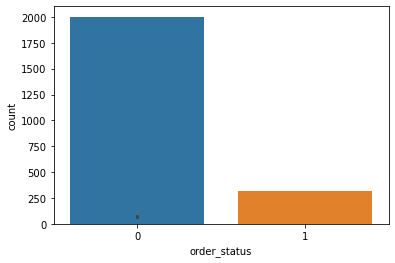

In [110]:
sns.barplot(x= 'order_status', y = 'gmv', data = df)
sns.countplot(x= 'order_status', data = df)


<AxesSubplot:xlabel='order_weekday', ylabel='delivery_time'>

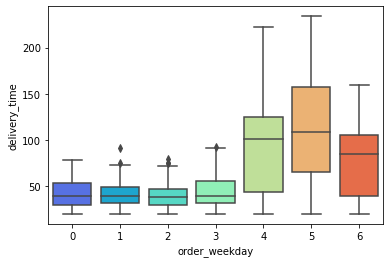

In [114]:
#Good box plot to understand the data
sns.boxplot(x = 'order_weekday', y = 'delivery_time', data = df, palette = 'rainbow' )

<AxesSubplot:xlabel='order_weekday_name', ylabel='gmv'>

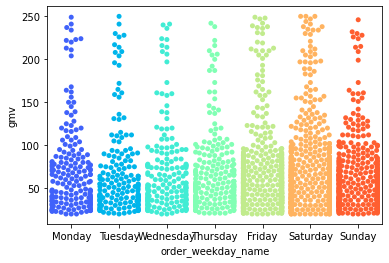

In [112]:
sns.swarmplot(x = 'order_weekday_name', y = 'gmv', data = df, palette = 'rainbow' )

<AxesSubplot:xlabel='order_weekday', ylabel='delivery_time'>

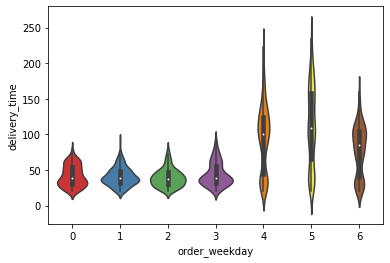

In [113]:
sns.violinplot(x= 'order_weekday', y = 'delivery_time', data = df, palette = 'Set1')